### Christopher Ayre
### DATA 620

#### WEEK 8 - HIGH FREQUENCY WORDS

__ASSIGNMENT__

1.Choose a corpus of interest.

2.How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

3.Taking the most common words, how many unique words represent half of the total words in the corpus?

4.Identify the 200 highest frequency words in this corpus.

5.Create a graph that shows the relative frequency of these 200 words.

6.Does the observed relative frequency of these words follow Zipf’s law? Explain.

7.In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [26]:
# LIBRARIES USED

# nltk.download
# nltk.download('inaugural')
# nltk.download('stopwords')

import nltk
from nltk.corpus import inaugural
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import pandas as pd


### The corpora of interest I choose was Inaugural from nltk.corpus which houses the transcripts from all United States Presidential Inauguaration speeches. I chose this corpora due to its relevance since we are currently in the middle of a presidential election. 


In [3]:
names = inaugural.fileids()
print(len(names))

names[0],names[57]

58


('1789-Washington.txt', '2017-Trump.txt')

### How many total unique words are in the corpus?
# 839
_(Please feel free to define unique words in any interesting, defensible way)._

__I hereby define Unique words as words not in the stopword list and are not punctuations or any other form of non word__

In [16]:
# I will focus on my Favorite inauguaration speech and see the number of words
obama1=list(inaugural.words(fileids=names[55]))
print(len(obama1))

# Create Stopwords and update to include punctuation
stop_words= stopwords.words('english')
add_to_stop_words = [',', '.', '-', ';' , '--', ':', "'", '(' , ')']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

# Execute Removal of stopwords from the speech
for i in stop_words:
    if i in obama1:
        while i in obama1:
            obama1.remove(i)

# See the List of unique words
unique_words_obama1 = list(set(obama1)) 
print(len(unique_words_obama1))

2726
839


### Unique words represent roughly a third of the total words in the corpus

### Identify the 200 highest frequency words in this corpus.

In [24]:
obama1_freq = nltk.FreqDist(obama1)


In [25]:
for key,value in obama1_freq.most_common(200):
    print(key,value)

us 23
nation 12
We 12
new 11
America 10
The 9
Our 9
every 8
must 8
For 8
world 7
less 6
They 6
work 6
And 6
cannot 6
common 6
people 6
today 5
generation 5
day 5
time 5
know 5
spirit 5
God 5
let 5
words 4
peace 4
crisis 4
far 4
hard 4
come 4
end 4
long 4
things 4
It 4
seek 4
men 4
women 4
greater 4
This 4
meet 4
whether 4
power 4
To 4
I 3
Americans 3
oath 3
prosperity 3
carried 3
ideals 3
So 3
economy 3
jobs 3
care 3
many 3
across 3
say 3
But 3
hope 3
history 3
forward 3
In 3
journey 3
freedom 3
life 3
last 3
question 3
courage 3
What 3
government 3
small 3
force 3
man 3
generations 3
father 3
future 3
nations 3
old 3
shall 3
moment 3
upon 3
may 3
children 3
... 3
stand 2
task 2
trust 2
service 2
well 2
cooperation 2
throughout 2
taken 2
still 2
waters 2
often 2
storms 2
At 2
true 2
understood 2
war 2
part 2
also 2
make 2
age 2
health 2
schools 2
fail 2
use 2
planet 2
These 2
confidence 2
fear 2
lower 2
challenges 2
face 2
met 2
short 2
On 2
purpose 2
conflict 2
false 2
remain 2
enduri

### Create a graph that shows the relative frequency of these 200 words.

In [33]:
df = pd.DataFrame(obama1_freq.most_common(200))
df.columns = ['word', 'frequency']

df.head()

,word,frequency
0,us,23
1,nation,12
2,We,12
3,new,11
4,America,10


In [34]:
df['relative_frequency'] = df['frequency']/df['frequency'].sum()
df = df.reset_index(drop=False)
df.head(10)

,index,word,frequency,relative_frequency
0,0,us,23,0.0368
1,1,nation,12,0.0192
2,2,We,12,0.0192
3,3,new,11,0.0176
4,4,America,10,0.0160
5,5,The,9,0.0144
6,6,Our,9,0.0144
7,7,every,8,0.0128
8,8,must,8,0.0128
9,9,For,8,0.0128


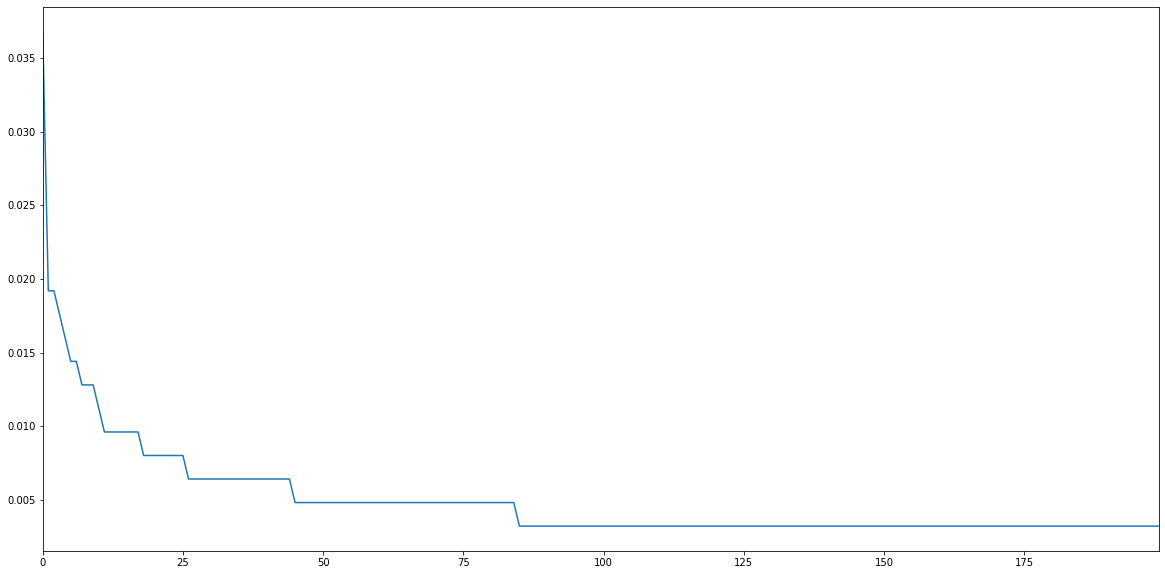

In [35]:
plt.figure(3,figsize=(20,10))
df['relative_frequency'].plot()
#plt.hist(df['word'], density=True)

### The observed relative frequency of these words do follow Zipf’s law. As displayed below - The frequency of any word is inversely proportional to its rank in the frequency table

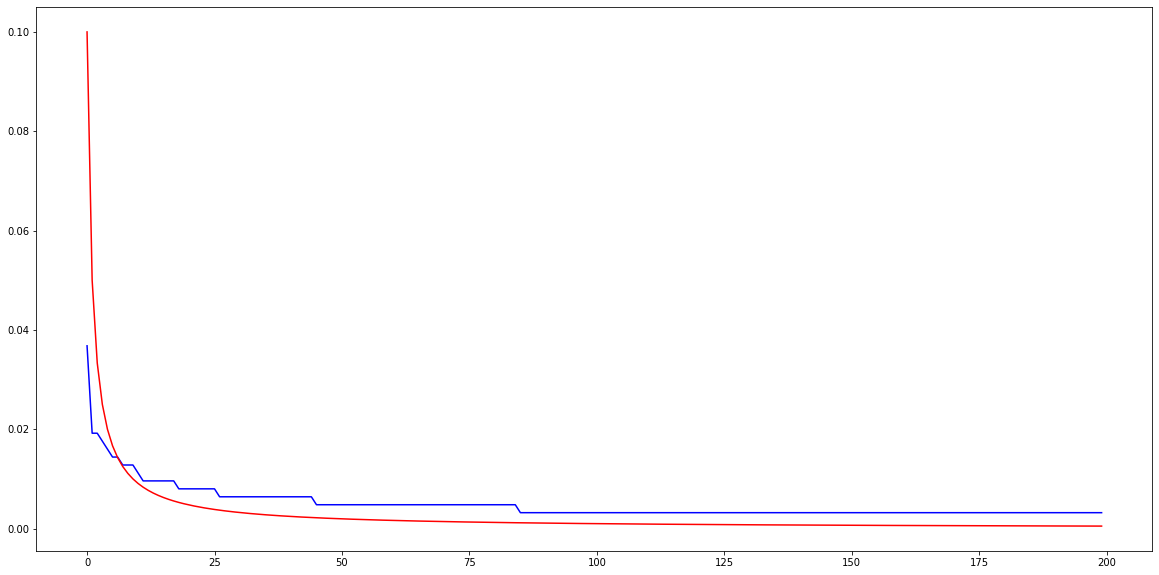

In [36]:
df['zip_probability'] = 0.1/(df['index'] + 1)

plt.figure(3,figsize=(20,10))
plt.plot(df['relative_frequency'], 'blue')
plt.plot(df['zip_probability'], 'red')
plt.show()

In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.

Obama's primary message during his inauguration was one of unity, togetherness and change. These themes are reflected throughout the most common words used. Considering the president's audience was the entire nation he did not seem to speak to any one group or sector, his words very general and easily understood. 